## Рабочая тетрадь 3. Задача классификации

### Постановка задачи классификации
***Классификация*** — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

***Классифицировать объект*** — значит, указать номер (или наименование класса), к которому относится данный объект.

***Классификация объекта*** — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.




### Функции в Python

Перед тем как рассматривать задачи классификации вспомним понятие функции (метода) в Python. Функция в python - объект, принимающий аргументы и возвращающий значение. Обычно функция определяется с помощью инструкции `def`.
Определим простейшую функцию:
```
def add(x, y):
    return x + y
```

Инструкция return говорит, что нужно вернуть значение. В нашем случае функция возвращает сумму x и y.

Теперь мы ее можем вызвать:

```
>>> add(1, 10)
11
>>> add('abc', 'def')
'abcdef'
```

Функция может быть любой сложности и возвращать любые объекты (списки, кортежи, и даже функции):

```
>>> def newfunc(n):
...     def myfunc(x):
...         return x + n
...     return myfunc
...
>>> new = newfunc(100)  # new - это функция
>>> new(200)
300
```
Функция может и не заканчиваться инструкцией return, при этом функция вернет значение None:

```
>>> def func():
...     pass
...
>>> print(func())
None
```
Функция может принимать произвольное количество аргументов или не принимать их вовсе. Также распространены функции с произвольным числом аргументов, функции с позиционными и именованными аргументами, обязательными и необязательными.
```
>>> def func(*args):
...     return args
...
>>> func(1, 2, 3, 'abc')
(1, 2, 3, 'abc')
>>> func()
()
>>> func(1)
(1,)
```
Как видно из примера, args - это кортеж из всех переданных аргументов функции, и с переменной можно работать также, как и с кортежем.

Функция может принимать и произвольное число именованных аргументов, тогда перед именем ставится **:
```
>>> def func(**kwargs):
...     return kwargs
...
>>> func(a=1, b=2, c=3)
{'a': 1, 'c': 3, 'b': 2}
>>> func()
{}
>>> func(a='python')
{'a': 'python'}
```

***1.2.1 Пример.*** Напишите функцию sum_range(start, end), которая суммирует все целые числа от значения «start» до величины «end» включительно. 
Если пользователь задаст первое число большее чем второе, просто поменяйте их местами.

In [ ]:
def sum_range(start, end):
    if start > end:
        end, start = start, end
    return sum(range(start, end + 1))

# Тесты
print(sum_range(2, 5))
print(sum_range(-4, 4))
print(sum_range(3, 2))

14
0
5


***1.2.2 Пример***. Напишите рекурсивную функцию вычисления факториала на языке Python.

In [ ]:
def fact(num):
    if num == 0: 
        return 1 # По договоренности факториал нуля равен единице
    else:
        return num * fact(num - 1) # возвращаем результат произведения num и результата возвращенного функцией fact(num - 1)
print(fact(5))

120


### Определение расстояния между объектами класса
Сходство или различие между объектами классификации устанавливается в зависимости от выбранного метрического расстояния между ними. Если каждый объект описывается n свойствами (признаками), то он может быть представлен как точка в n-мерном пространстве, и сходство с другими объектами будет определяться как соответствующее расстояние. При классификации используются различные меры расстояния между объектами.

1. *Евклидово расстояние*

Это, пожалуй, наиболее часто используемая мера расстояния. Она является геометрическим расстоянием в многомерном пространстве и вычисляется следующим образом:

<img src = 'http://www.aiportal.ru/images/math/math_941.5_9474ce3912691d155779de950b144778.png'/>

где 
* P – расстояние между объектами A и B;
* A_i – значение i-свойства объекта A;
* B_i – значение i-свойства объекта B.

2. *Квадрат евклидова расстояния*

Данная мера расстояния используется в тех случаях, когда требуется придать больше значение более отдаленным друг от друга объектам. Это расстояние вычисляется следующим образом:

<img src = 'http://www.aiportal.ru/images/math/math_941.5_94f32d37df18c1c8ec7ba080988a700a.png'/>

3. *Взвешенное евклидово расстояние*

Применяется в тех случаях, когда каждому i-свойству удается приписать некоторый «вес» wi, пропорционально степени важности признака в задаче классификации:

<img src = 'http://www.aiportal.ru/images/math/math_941.5_d45e093918e3aa031a4c512e8bd3d8ce.png'/>
            
4. *Хеммингово расстояние*

Также называется манхэттенским, сити-блок расстоянием или расстоянием городских кварталов. Это расстояние является разностью по координатам. Хеммингово расстояние вычисляется по формуле:

<img src = 'http://www.aiportal.ru/images/math/math_950_91b59852ba8e8cb132053800ce4ee186.png'/>

5. *Расстояние Чебышева*

Принимает значение наибольшего модуля разности между значениями соответствующих свойств (признаков) объектов:

<img src = 'http://www.aiportal.ru/images/math/math_984.5_0dbfcea0170ddef1ace8b3f8aa4b32df.png'/>

Выбор меры расстояния и весов для классифицирующих свойств – очень важный этап, так как от этих процедур зависят состав и количество формируемых классов, а также степень сходства объектов внутри классов.


***1.2.3 Пример***. Напишите функции в Python, которая вычисляет Евклидово расстояние между двумя массивами NumPy.

In [ ]:
import numpy as np
def euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2)) ** 0.5

x = np.array([0,0,0])
y = np.array([3,3,3])
print(euclidean_distance(x,y))

5.196152422706632


***1.2.4 Пример***. Напишите 4 функции в Python, которые рассчитывают квадрат Евклидова расстояния, взвешенное евклидово расстояние, Хеммингово расстояние и расстояние Чебышева между двумя массивами NumPy.

In [ ]:
def sqr_euclidean_distance(v1, v2):
    return sum((x - y) ** 2 for x, y in zip(v1, v2)) 

def weighted_euclidean_distance(v1, v2, w):
    return sum((x - y) ** 2 * s  for x, y, s in zip(v1, v2, w)) ** 0.5

def manhattan_distance(v1, v2):
    return sum(abs(x - y) for (x, y) in zip(v1, v2))

def chebyshev_distance(v1, v2):
    return max(abs(x - y) for (x, y) in zip(v1, v2))

x = np.array([0,0,0])
y = np.array([3,3,3])
w = np.array([0,0,1])
print(sqr_euclidean_distance(x,y))
print(weighted_euclidean_distance(x,y,w))
print(manhattan_distance(x,y))
print(chebyshev_distance(x,y))

27
3.0
9
3


***1.2.5 Пример*** В Python есть встроенные функции для вычисления расстояний между векторами. Мы будем использовать NumPy для расчета расстояния для двух точек, поскольку ранее рассмотренные структуры данных могут быть переведены в Numpy массив с помошью специальных функциий. Например, для серий это будет выглядеть следующим образом: `seriesName.to_numpy()`. 

Для удобства визуализации и анализа результатов в дальнейших расчетах будм использовать 2 точки в 3-х мерном пространстве:

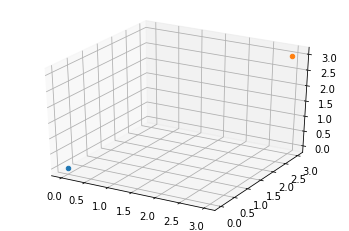

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
plt.show()

***1.2.6 Пример.*** Рассчитать расстояния между двумя точками с использованием методов определения расстояний, представленных выше.

In [ ]:
#Расстояние Евклида
print(np.linalg.norm(x-y))
#Квадрат Евклидова расстояния
print(np.linalg.norm(x-y) ** 2)
#Расстояние Чебышева
print(np.linalg.norm(x-y, ord=np.inf))
#Расстояние Хемминга
print(np.linalg.norm(x-y,ord=1))


5.196152422706632
27.0
3.0
9.0


***1.3.1 Задание***. Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

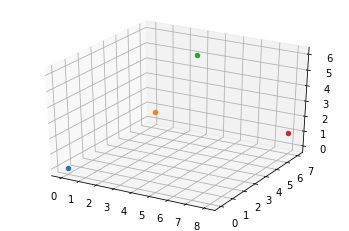

27
11.61895003862225
27
27


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
 
ax.scatter(0,0,0)
ax.scatter(3,3,3)
ax.scatter(4,5,6)
ax.scatter(8,7,1)
plt.show()
 
def sqr_euclidean_distance(v1,v2):
    return sum((x - y) ** 2 for x,y in zip(v1,v2))
 
def weighted_euclidean_distance(v1,v2,w):
    return sum((x - y) ** 2 * s for x,y,s in zip(v1,v2,w)) ** 0.5
 
def manhattan_distance(v1,v2):
    return sum(abs(x - y) ** 2 for (x,y) in zip(v1,v2))
 
def chebyshev_distance(v1,v2):
    return sum(abs(x - y) ** 2 for (x,y) in zip(v1,v2))
 
x = (0,0,0)
y = (3,3,3)
w = (4,5,6)
z = (8,7,1)
 
print(sqr_euclidean_distance(x,y))
print(weighted_euclidean_distance(x,y,w))
print(manhattan_distance(x,y))
print(chebyshev_distance(x,y))

### Решение задачи классификации методом k ближайших соседей
Метод k-ближайших соседей используется для решения задачи классификации. Он относит объекты к классу, которому принадлежит большинство из k его ближайших соседей в многомерном пространстве признаков. Это один из простейших алгоритмов обучения классификационных моделей.
Число k – это количество соседних объектов в пространстве признаков, которые сравниваются с классифицируемым объектом. Иными словами, если k=10, то каждый объект сравнивается с 10-ю соседями. 
В процессе обучения алгоритм просто запоминает все векторы признаков и соответствующие им метки классов. При работе с реальными данными, т.е. наблюдениями, метки класса которых неизвестны, вычисляется расстояние между вектором нового наблюдения и ранее запомненными. Затем выбирается k ближайших к нему векторов, и новый объект относится к классу, которому принадлежит большинство из них.
Приведем алгоритм метода.
1. Выберите значение K соседей (скажем, k = 5)
2. Найдите ближайшую точку данных K (5) для нашей новой точки данных на основе евклидова расстояния (которое мы обсудим позже)
3. Среди этих K точек данных подсчитайте точки данных в каждой категории.
4. Назначьте новую точку данных категории, которая имеет наибольшее количество соседей с новой точкой данных.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1200px-KnnClassification.svg.png' width = "30%" height = "30%"/>

Модуль библиотеки sklearn - sklearn.neighbors предоставляет функциональные возможности для контролируемого обучения на основе соседей. Обучение на основе контролируемых соседей бывает двух видов: классификация данных с дискретными метками и регрессия для данных с непрерывными метками. В данном разделе рассмотрим несколько примеров с использованием названного метода.

***2.2.1 Пример.*** В примере показано создание 2d-массива со значениями x и y. Список target содержит возможные выходные классы (часто называемые метками). Далее происходит обучене классификатора k-ближайших соседей по исходным данным. Далее производится прогноз принадлежности к классам для двух точек данных. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# данные
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target =  [0, 0, 0, 1, 1, 1]

# обучаем модель k-ближайших соседей к данным
K = 3
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)
print(model)

# делаем прогноз
print( '(-2,-2) is class'),
print( model.predict([[-2,-2]]) )

print( '(1,3) is class'),
print( model.predict([[1,3]]) )

KNeighborsClassifier(n_neighbors=3)
(-2,-2) is class
[0]
(1,3) is class
[1]


***2.2.2 Пример.*** Далее приведем более наглядный пример. Будет построена граница решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. Датасет содержит наблюдения за 150 разными цветками ирисов, данные по каждому цветку расположены в строках. В стобцах записаны длина и ширина чашелистика, длина и ширина лепестка, вид ириса.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


***2.2.3 Пример*** Покажем на графиках зависимости ширины лепестка от его длины, а также аналогичный график зависимость для длины и ширины чашелистика. Разные виды цветков отмечены разными цветами.

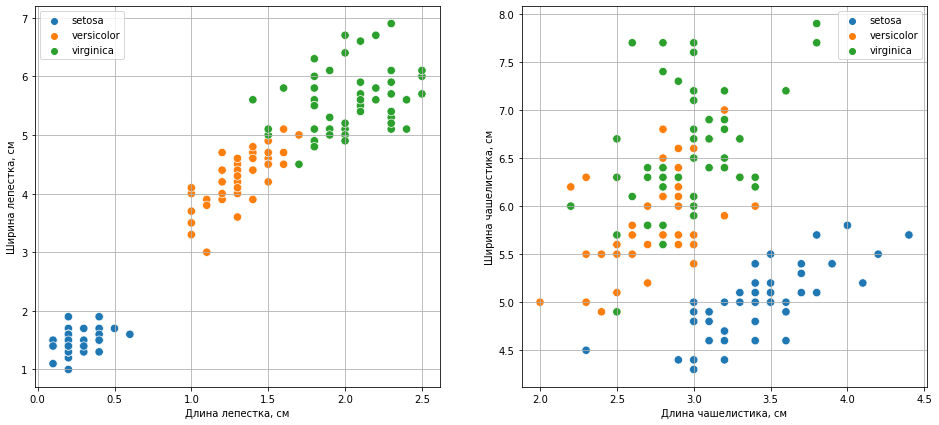

In [ ]:
# Объявляем фигуру из двух графиков и ее размер
plt.figure(figsize=(16, 7))

# Левый график
plt.subplot(121)
sns.scatterplot(
    data=iris,  # из этой таблицы нарисовать точки
    x='petal_width', y='petal_length',  # с этими координатами,
    hue='species', # для которых цвет определить согласно этому столбцу
    s=70  # размер точек
)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend()  # добавить легенду
plt.grid()  # добавить сетку

# Правый график аналогично
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species', s=70)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Ширина чашелистика, см')
plt.legend()
plt.grid();

***2.2.4 Пример*** Из графиков видно, что в первом случае классы визуально хорошо отделимы друг от друга, хотя два классе имеют небольшое пересечение. Во втором случае разделить два класса между собой уже намного труднее. 

Далее разделим датасет на обучающую и тестовую выборки в соотношении 80:20. *Обучающая выборка (training sample)* — выборка, по которой производится настройка (оптимизация параметров) модели зависимости. *Тестовая (или контрольная) выборка (test sample)* — выборка, по которой оценивается качество построенной модели.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указывать iloc
    iris.iloc[:, :-1],  # берем все колонки кроме последней в признаки
    iris.iloc[:, -1],  # последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
10,5.4,3.7,1.5,0.2
59,5.2,2.7,3.9,1.4
56,6.3,3.3,4.7,1.6
44,5.1,3.8,1.9,0.4
17,5.1,3.5,1.4,0.3


In [ ]:
y_train.head()

10        setosa
59    versicolor
56    versicolor
44        setosa
17        setosa
Name: species, dtype: object

In [ ]:
#Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

array(['virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica'], dtype=object)

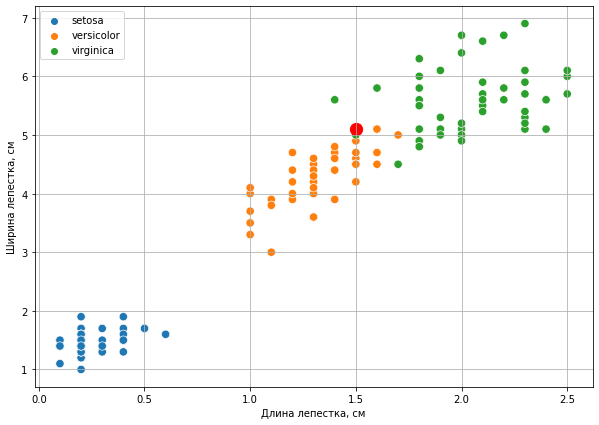

In [ ]:
# Покажем на графике, что отражает полученное число.
# Красным цветом обозначены точки, для которых классификация сработала неправильно.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [ ]:
#качество модели (доля правильно классифицированных точек)
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) :.4}')

accuracy: 0.9667


***2.3.1 Задание***. Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте результаты.

['virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica'
 'versicolor' 'virginica' 'virginica' 'setosa']


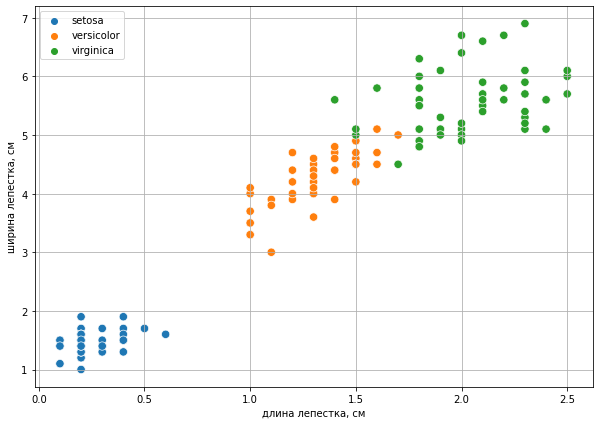

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(
iris.iloc[:, :-1],
iris.iloc[:, -1],
test_size = 0.15
)
 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()
 
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
for i in range(len(y_test)):
  if(np.array(y_test)[i] != y_pred[i]):
      plt.scatter(X_test.iloc[i,3], X_test[i,2], color='red', s=150)
 
print(y_pred)
plt.figure(figsize=(10,7))
sns.scatterplot(x='petal_width', y='petal_length', data = iris,hue='species',s=70)
plt.xlabel('длина лепестка, см')
plt.ylabel('ширина лепестка, см')
plt.legend(loc=2)
plt.grid() 

### 3.1 Работа с категориальными данными
Часто бывает полезно разбивать объекты на категории не по количеству, а по качеству. Эта качественная информация нередко представляется как принадлежность наблюдения к отдельной категории, такой как пол, цвета или марка автомобиля. Однако не все категориальные данные одинаковые. Наборы категорий без внутреннего упорядочения называются номинальными. Примеры номинальных категорий включают:

* синий, красный, зеленый;
* мужчина, женщина;
* банан, клубника, яблоко.

С другой стороны, когда набор категорий имеет некое естественное упорядочение, мы называем его порядковым. Например:

* низкий, средний, высокий;
* молодые, старые;
* согласен, нейтрален, не согласен.

Более того, категориальная информация часто представлена в данных в виде вектора или столбца символьных значений (например, "Москва", "Санкт-Петербург", "Казань"). Проблема в том, что большинство машинно-обучающихся алгоритмов требуют ввода числовых значений.

Алгоритм k ближайших соседей предоставляет простой пример. Одним из шагов в алгоритме является вычисление расстояний между наблюдениями — часто с использованием евклидова расстояния. Однако вычисление расстояния, очевидно, невозможно, если значение х, является строковым типом (например, "Москва"). Для того чтобы его можно было ввести в уравнение евклидова расстояния, нам нужно преобразовать это строковое значение в числовой формат. Наша цель — сделать преобразование, которое правильно передает информацию в категориях (упорядоченность, относительные интервалы между категориями и т. д.). 
Существует большое количество методов кодирования категориальных данных, среди которых нет универсальных. Выбирая метод, стоит отталкиваться от ваших данных, мощности множества категорий и алгоритма машинного обучения.

Далее рассмотрим некоторые методы таких преобразований.


***3.2.1 Пример***. Дан порядковый категориальный признак (например, высокий, средний, низкий). Выполнить его кодировку. 

Для решения задачи можно использовать метод replace фрейма данных pandas для преобразования строковых меток в числовые эквиваленты:

In [ ]:
# Загрузить библиотеку
import pandas as pd

# Создать признаки
dataframe = pd.DataFrame({"оценка": ["низкая", "низкая", "средняя", "средняя", "высокая"]})
# Создать словарь преобразования шкалы 
scale_mapper = {"низкая":1,"средняя":2,"высокая":3}

# Заменить значения признаков значениями словаря 
dataframe["оценка"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64

***3.2.2 Пример.*** Дан словарь, и требуется его конвертировать в матрицу признаков.

Для решения задачи можно задействовать класс-векторизатор словаря Dictvectorizer:

In [ ]:
# Импортировать библиотеку
from sklearn.feature_extraction import DictVectorizer
# Создать словарь
data_dict = [{"красный": 2, "синий": 4},
             {"красный": 4, "синий": 3},
             {"красный": 1, "желтый": 2},
             {"красный": 2, "желтый": 2}]
# Создать векторизатор словаря 
dictvectorizer = DictVectorizer(sparse=False)
# Конвертировать словарь в матрицу признаков 
features = dictvectorizer.fit_transform(data_dict)
features


array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

***3.3.2 Задание***. Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
data_dict = [{"grey":1,"hazel":4},
{"grey":3,"green":2},
{"blue":2,"hazel":2},
{"blue":1,"hazel":1}]
dictv = DictVectorizer(sparse=False)
features = dictv.fit_transform(data_dict)
print(features)

[[0. 0. 1. 4.]
 [0. 2. 3. 0.]
 [2. 0. 0. 2.]
 [1. 0. 0. 1.]]
